In [10]:
import matplotlib.pyplot as plt
from IPython.display import display, Latex
from matplotlib.ticker import MultipleLocator
import numpy as np  # Original numpy

from enum import Enum

In [11]:
dictionary = {
    'data_0' : 'result_[0].npy',
    'data_0.005' : 'result_[0.005].npy',
    'data_0.05' : 'result_[0.05].npy',
    'data_0.1' : 'result_[0.1].npy',
    'data_0.5' : 'result_[0.5].npy'
}

data = {}

for key, file_name in dictionary.items():
    data[key] = np.load(file_name)

In [12]:
# [2-qubit]
class INDEX(Enum):
    PHI = 0
    CFI = 1
    
    THETA_X = 2
    
    PHI_Z = 3
    
    TAU_1 = 4
    TAU_2 = 5

class DataPlotter:
    def __init__(self, data_in):
        self.data_in = data_in
        
    def plot_cfi(self, tau_dephase = 0, gamma_ps = 0):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.CFI.value],
            label = f'$\\tau$ = {tau_dephase}'
        )
        plt.title(f'CFI at $\gamma_{{ps}} = {gamma_ps}$')
        plt.xlabel('Time')
        plt.ylabel('CFI')
        plt.grid()
        plt.legend()
        
    def plot_theta_x(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.THETA_X.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\theta_{{x}}$',
            ylim = set_ylim
        )
        
    def plot_phi_z(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.PHI_Z.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\phi_{{z}}$',
            ylim = set_ylim
        )
        
    def plot_phi_z2(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.PHI_Z2.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\phi_{{z2}}$',
            ylim = set_ylim
        )
        
    def plot_tau_1(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.TAU_1.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\tau_{{1}}$',
            ylim = set_ylim
        )
        
    def plot_tau_2(self, tau_dephase = 0, set_ylim=(-np.pi/2, np.pi/2)):
        plt.plot(
            self.data_in[0][:, INDEX.PHI.value],
            self.data_in[0][:, INDEX.TAU_2.value],
            label = f"$\\tau$ = {tau_dephase}"
        )
        self.plot_setting(
            title = f'Optimized $\\tau_{{2}}$',
            ylim = set_ylim
        )
        
    def plot_setting(self, title, xlabel='Time', ylabel='Rad', ylim =(-2*np.pi, 2*np.pi)):
        plt.yticks(
            [-np.pi, -3*np.pi/4, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, (3*np.pi)/2, 2*np.pi, 5*np.pi/2], 
            ['$-\pi$', '$-3\pi/4$', '$-\pi/2$', '$-\pi/4$', '0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$', '$3\pi/2$', '$2\pi$', '$5\pi/2$']
        )
        plt.ylim(ylim)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid()
        plt.legend()

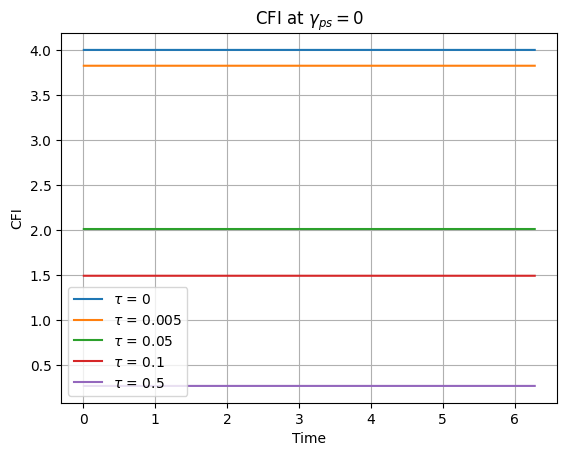

In [14]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_cfi(tau_dephase = current_tau, gamma_ps=0)

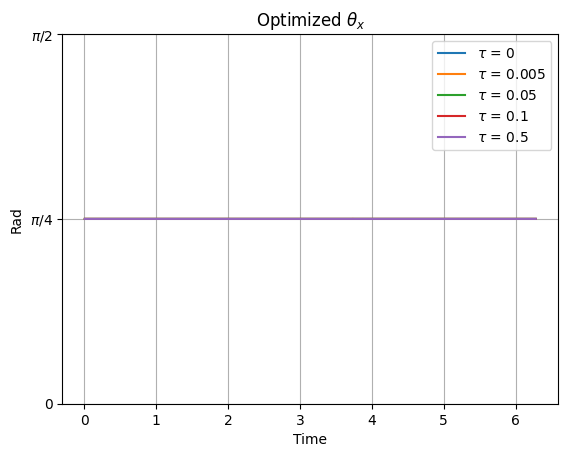

In [15]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_theta_x(tau_dephase=current_tau, set_ylim=(0, 2*np.pi/4))

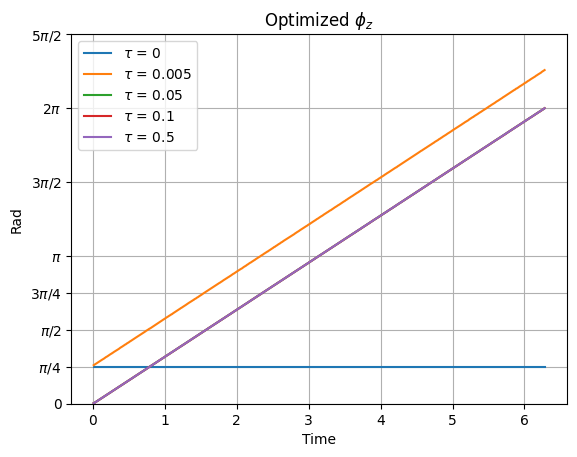

In [16]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_phi_z(tau_dephase=current_tau, set_ylim=(0, 5*np.pi/2))

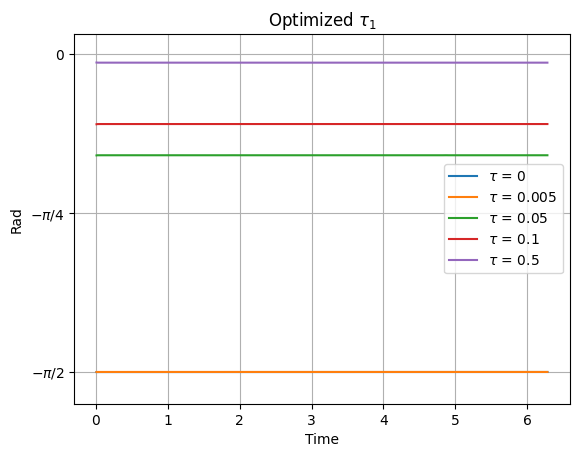

In [17]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_tau_1(tau_dephase=current_tau, set_ylim=(-1.1*np.pi/2, 1e-1))

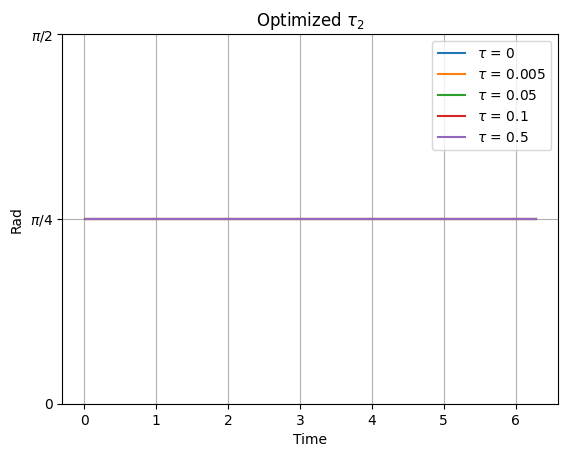

In [18]:
for idx, data_set in data.items():
    plotter = DataPlotter(data_set)
    current_tau = idx.split('_')[1]
    plotter.plot_tau_2(tau_dephase=current_tau, set_ylim=(0, np.pi/2))